<h3> HomeWork -2 <h3>
<h4> Reuters dataset <h4>

In [33]:
import numpy as np
import sys
import matplotlib.pyplot as plt
import copy


import keras
from keras.datasets import reuters
from keras import models
from keras import layers
from keras import optimizers
from keras.utils.np_utils import to_categorical

<h3> Data Processing <h3>

In [16]:
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

#vectorized training & test data and labels
x_train, x_test = vectorize_sequences(train_data), vectorize_sequences(test_data)
one_hot_train_labels,one_hot_test_labels = to_categorical(train_labels),to_categorical(test_labels)

# Validation set
x_val, partial_x_train = x_train[:1000], x_train[1000:]
y_val, partial_y_train = one_hot_train_labels[:1000], one_hot_train_labels[1000:]

<h3> Graph Visualization <h3>

In [12]:
def plot(history):
    plt.figure(figsize = (10,5))
    
    plt.subplot(1, 2, 1)
    plt.plot(history['loss'], label = 'Training loss')
    plt.plot(history['val_loss'], label = 'Validation loss')
    plt.title('Training and validation loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    
    plt.subplot(1, 2, 2)
    plt.plot(history['accuracy'], label = 'Training accuracy')
    plt.plot(history['val_accuracy'], label = 'Validation accuracy')
    plt.title('Training and validation accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    
    plt.show()
    
    print('Maximum Training Accuracy:',max(history['accuracy']), 'Maximum Validation Accuracy', max(history['val_accuracy']))

<h3> Model #textbook <h3>
    <b> gives accuracy of 78.9% <b>

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 1s 74us/step - loss: 2.6302 - accuracy: 0.5350 - val_loss: 1.7329 - val_accuracy: 0.6430
Epoch 2/20
7982/7982 [==============================] - 1s 63us/step - loss: 1.4380 - accuracy: 0.7036 - val_loss: 1.3113 - val_accuracy: 0.7190
Epoch 3/20
7982/7982 [==============================] - 1s 65us/step - loss: 1.0731 - accuracy: 0.7741 - val_loss: 1.1385 - val_accuracy: 0.7540
Epoch 4/20
7982/7982 [==============================] - 1s 65us/step - loss: 0.8447 - accuracy: 0.8231 - val_loss: 1.0281 - val_accuracy: 0.7820
Epoch 5/20
7982/7982 [==============================] - 1s 64us/step - loss: 0.6777 - accuracy: 0.8564 - val_loss: 1.0035 - val_accuracy: 0.7870
Epoch 6/20
7982/7982 [==============================] - 1s 64us/step - loss: 0.5435 - accuracy: 0.8891 - val_loss: 0.9441 - val_accuracy: 0.8030
Epoch 7/20
7982/7982 [==============================] - 1s 63us/step - loss: 0.442

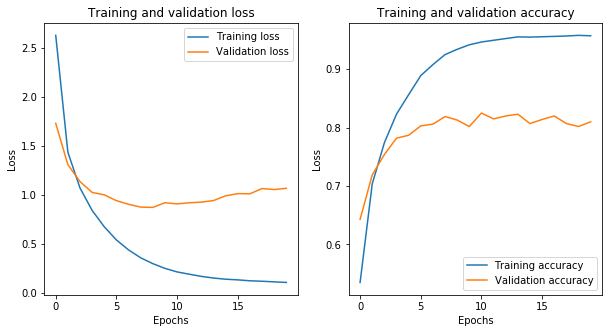

Maximum Training Accuracy: 0.9580306 Maximum Validation Accuracy 0.824999988079071
2246/2246 [==============================] - 0s 53us/step
Maximum test Accuracy: [1.2513758497161729, 0.7894033789634705]


In [18]:
model = models.Sequential()
model.add(layers.Dense(64, activation = 'relu', input_shape = (10000,)))
model.add(layers.Dense(64,activation = 'relu'))
model.add(layers.Dense(46, activation = 'softmax'))
model.compile(optimizer = 'rmsprop', loss = 'categorical_crossentropy', metrics=['accuracy'])

history = model.fit(partial_x_train, partial_y_train, epochs = 20, batch_size = 512, validation_data = (x_val, y_val))
#graph
plot(history.history)
results = model.evaluate(x_test, one_hot_test_labels)
print('Maximum test Accuracy:', results)

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 1s 78us/step - loss: 3.5900 - accuracy: 0.2913 - val_loss: 3.2871 - val_accuracy: 0.4900
Epoch 2/20
7982/7982 [==============================] - 0s 54us/step - loss: 2.9585 - accuracy: 0.5412 - val_loss: 2.6547 - val_accuracy: 0.5800
Epoch 3/20
7982/7982 [==============================] - 0s 43us/step - loss: 2.3325 - accuracy: 0.6275 - val_loss: 2.1581 - val_accuracy: 0.6340
Epoch 4/20
7982/7982 [==============================] - 0s 54us/step - loss: 1.8900 - accuracy: 0.6612 - val_loss: 1.8339 - val_accuracy: 0.6390
Epoch 5/20
7982/7982 [==============================] - 0s 58us/step - loss: 1.5937 - accuracy: 0.6799 - val_loss: 1.6135 - val_accuracy: 0.6640
Epoch 6/20
7982/7982 [==============================] - 0s 51us/step - loss: 1.3841 - accuracy: 0.7057 - val_loss: 1.4675 - val_accuracy: 0.6810
Epoch 7/20
7982/7982 [==============================] - 0s 59us/step - loss: 1.229

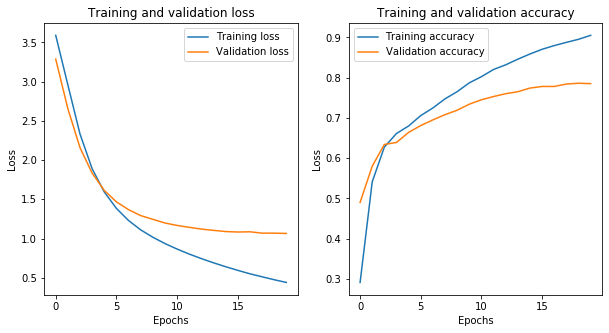

Maximum Training Accuracy: 0.90491104 Maximum Validation Accuracy 0.7860000133514404
2246/2246 [==============================] - 0s 44us/step
Maximum test Accuracy: [1.1019427840028186, 0.7586820721626282]


In [35]:
model = models.Sequential()
model.add(layers.Dense(16, activation = 'relu', input_shape = (10000,)))
model.add(layers.Dense(16,activation = 'relu'))
model.add(layers.Dense(46, activation = 'softmax'))
model.compile(optimizer = 'rmsprop', loss = 'categorical_crossentropy', metrics=['accuracy'])

history = model.fit(partial_x_train, partial_y_train, epochs = 20, batch_size = 512, validation_data = (x_val, y_val))
#graph
plot(history.history)
results = model.evaluate(x_test, one_hot_test_labels)
print('Maximum test Accuracy:', results)

<h3> Change 2 <h3>
    <h4> Model-3 : Decreasing learning are and increasing the units of hidden layer to 128 <h4>
        <p> gives test accuracy of 51.42<p>
        

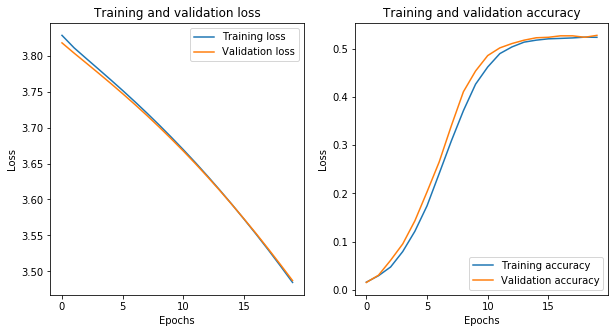

Maximum Training Accuracy: 0.5243047 Maximum Validation Accuracy 0.527999997138977
2246/2246 [==============================] - 0s 61us/step
Maximum test Accuracy: [3.4919736678326436, 0.5142475366592407]


In [36]:
model = models.Sequential()
model.add(layers.Dense(128, activation = 'relu', input_shape = (10000,)))
model.add(layers.Dense(128,activation = 'relu'))
model.add(layers.Dense(46, activation = 'softmax'))
model.compile(optimizer=keras.optimizers.rmsprop(lr=0.00001), loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(partial_x_train, partial_y_train, epochs = 20, batch_size = 512, validation_data = (x_val, y_val),verbose = 0)
plot(history.history)
results = model.evaluate(x_test, one_hot_test_labels)
print('Maximum test Accuracy:', results)

<h3> Change 3: Model-4: with same hidden layers just increasing the learning rate <h3>
        <b> Improves the accuracy for some instance <b>

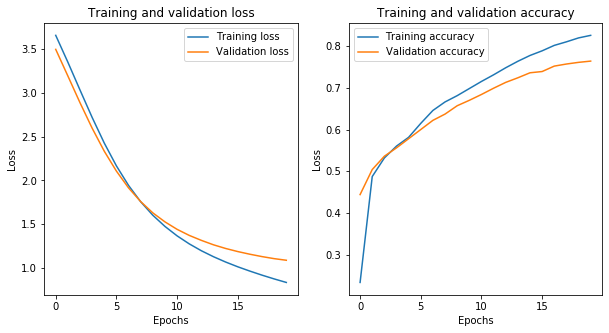

Maximum Training Accuracy: 0.8257329 Maximum Validation Accuracy 0.7639999985694885
2246/2246 [==============================] - 0s 59us/step
Maximum test Accuracy: [1.1537509947510989, 0.7448797821998596]


In [37]:
model = models.Sequential()
model.add(layers.Dense(128, activation = 'relu', input_shape = (10000,)))
model.add(layers.Dense(128,activation = 'relu'))
model.add(layers.Dense(46, activation = 'softmax'))
model.compile(optimizer=keras.optimizers.rmsprop(lr=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(partial_x_train, partial_y_train, epochs = 20, batch_size = 512, validation_data = (x_val, y_val),verbose = 0)
plot(history.history)
results = model.evaluate(x_test, one_hot_test_labels)
print('Maximum test Accuracy:', results)

<h3> Change 4: Model-5: with changing hidden layers units to 64 and increasing the learning rate <h3>
        <b> Improves the accuracy to 78.04%<b>

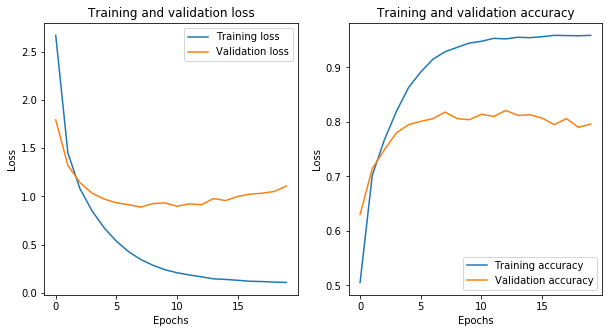

Maximum Training Accuracy: 0.95878226 Maximum Validation Accuracy 0.8209999799728394
2246/2246 [==============================] - 0s 51us/step
Maximum test Accuracy: [1.2377631233296857, 0.7804986834526062]


In [39]:
model = models.Sequential()
model.add(layers.Dense(64, activation = 'relu', input_shape = (10000,)))
model.add(layers.Dense(64,activation = 'relu'))
model.add(layers.Dense(46, activation = 'softmax'))
model.compile(optimizer=keras.optimizers.rmsprop(lr=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(partial_x_train, partial_y_train, epochs = 20, batch_size = 512, validation_data = (x_val, y_val),verbose = 0)
plot(history.history)
results = model.evaluate(x_test, one_hot_test_labels)
print('Maximum test Accuracy:', results)

<h3> Change 5: Model-6:Increasing hidden layers to 10<h3>
        <b> Decrases test accuracy to 55.56%%<b>

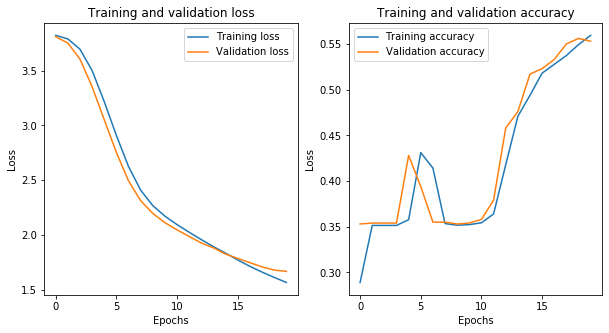

Maximum Training Accuracy: 0.55938363 Maximum Validation Accuracy 0.5559999942779541
2246/2246 [==============================] - 0s 88us/step
Maximum test Accuracy: [1.7067954054074106, 0.5556545257568359]


In [90]:
model = models.Sequential()
model.add(layers.Dense(64, activation = 'relu', input_shape = (10000,)))
model.add(layers.Dense(64,activation = 'relu'))
model.add(layers.Dense(64,activation = 'relu'))
model.add(layers.Dense(64,activation = 'relu'))
model.add(layers.Dense(64,activation = 'relu'))
model.add(layers.Dense(64,activation = 'relu'))
model.add(layers.Dense(64,activation = 'relu'))
model.add(layers.Dense(64,activation = 'relu'))
model.add(layers.Dense(64,activation = 'relu'))
model.add(layers.Dense(64,activation = 'relu'))
model.add(layers.Dense(64,activation = 'relu'))
model.add(layers.Dense(46, activation = 'softmax'))
model.compile(optimizer=keras.optimizers.rmsprop(lr=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(partial_x_train, partial_y_train, epochs = 20, batch_size = 512, validation_data = (x_val, y_val),verbose = 0)
plot(history.history)
results = model.evaluate(x_test, one_hot_test_labels)
print('Maximum test Accuracy:', results)

<h3> Change 6: Model-7:With no Hidden layers<h3>
        <b> Decrases test accuracy to 69.36%%<b>

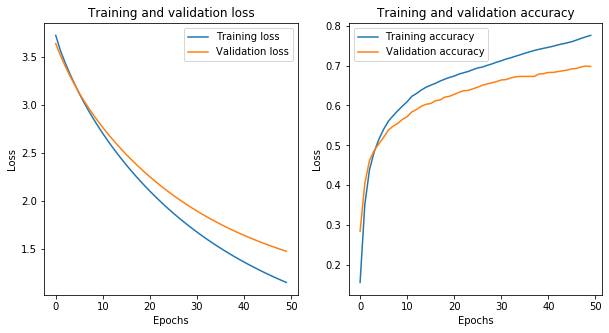

Maximum Training Accuracy: 0.77612126 Maximum Validation Accuracy 0.6990000009536743
2246/2246 [==============================] - 0s 50us/step
Maximum test Accuracy: [1.5324377913827463, 0.6936776638031006]


In [51]:
model = models.Sequential()
model.add(layers.Dense(46, activation = 'softmax'))
model.compile(optimizer=keras.optimizers.rmsprop(lr=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(partial_x_train, partial_y_train, epochs = 50, batch_size = 512, validation_data = (x_val, y_val),verbose = 0)
plot(history.history)
results = model.evaluate(x_test, one_hot_test_labels)
print('Maximum test Accuracy:', results)

<h3> Change 7: Model-8:With one Hidden layer of 32 units<h3>
        <b> Increases test accuracy to 73.06%%<b>

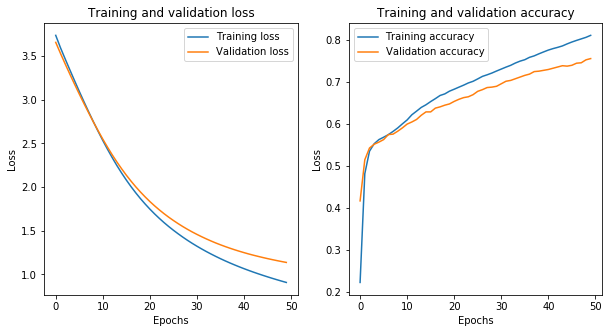

Maximum Training Accuracy: 0.8113255 Maximum Validation Accuracy 0.7559999823570251
2246/2246 [==============================] - 0s 46us/step
Maximum test Accuracy: [1.2160013354684451, 0.7306322455406189]


In [53]:
model = models.Sequential()
model.add(layers.Dense(32, activation = 'relu', input_shape= (10000,)))
model.add(layers.Dense(46, activation = 'softmax'))
model.compile(optimizer=keras.optimizers.rmsprop(lr=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(partial_x_train, partial_y_train, epochs = 50, batch_size = 512, validation_data = (x_val, y_val),verbose = 0)
plot(history.history)
results = model.evaluate(x_test, one_hot_test_labels)
print('Maximum test Accuracy:', results)

<h3> Change 8: Model-9: Increasing the size of hidden units to 512 and changing optimizer to adam optimizer<h3>
        <b>Increases test accuracy to 77.24%%<b>

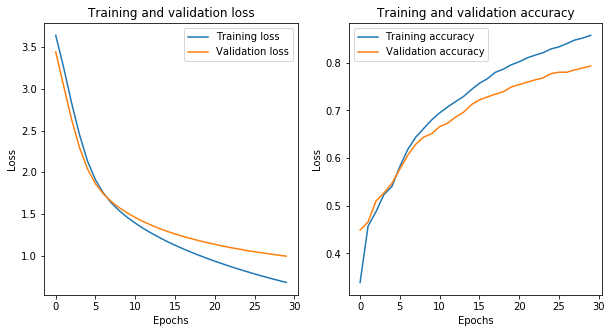

Maximum Training Accuracy: 0.8573039 Maximum Validation Accuracy 0.7929999828338623
2246/2246 [==============================] - 0s 124us/step
Maximum test Accuracy: [1.0563942169569904, 0.7724844217300415]


In [60]:
model = models.Sequential()
model.add(layers.Dense(512, activation = 'relu', input_shape= (10000,)))
model.add(layers.Dense(512, activation = 'relu'))
model.add(layers.Dense(46, activation = 'softmax'))
model.compile(optimizer=optimizers.Adamax(lr=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(partial_x_train, partial_y_train, epochs = 30, batch_size = 512, validation_data = (x_val, y_val),verbose = 0)
plot(history.history)
results = model.evaluate(x_test, one_hot_test_labels)
print('Maximum test Accuracy:', results)

<h3> Change 9: Model-10: Increasing the size of hidden units to 128 and changing optimizer to adam optimizer<h3>
        <b>Increases test accuracy to 78.85%<b>

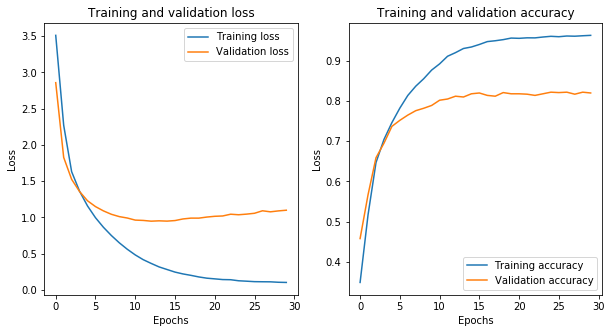

Maximum Training Accuracy: 0.9632924 Maximum Validation Accuracy 0.8220000267028809
2246/2246 [==============================] - 0s 74us/step
Maximum test Accuracy: [1.201238633900589, 0.7885128855705261]


In [63]:
model = models.Sequential()
model.add(layers.Dense(128, activation = 'relu', input_shape= (10000,)))
model.add(layers.Dense(128, activation = 'relu'))
model.add(layers.Dense(128, activation = 'relu'))
model.add(layers.Dense(46, activation = 'softmax'))
model.compile(optimizer=optimizers.Adamax(lr=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(partial_x_train, partial_y_train, epochs = 30, batch_size = 512, validation_data = (x_val, y_val),verbose = 0)
plot(history.history)
results = model.evaluate(x_test, one_hot_test_labels)
print('Maximum test Accuracy:', results)

<h2> Best Accuracy <h2>
<h3> Change 10: Model-11: Adding Dropout layer of 0.1 rate<h3>
        <b>Increases test accuracy to 79.29%<b>

Train on 7982 samples, validate on 1000 samples
Epoch 1/30
7982/7982 [==============================] - 2s 224us/step - loss: 3.2770 - accuracy: 0.4336 - val_loss: 2.5141 - val_accuracy: 0.5320
Epoch 2/30
7982/7982 [==============================] - 1s 80us/step - loss: 2.0461 - accuracy: 0.5626 - val_loss: 1.7080 - val_accuracy: 0.6080
Epoch 3/30
7982/7982 [==============================] - 1s 85us/step - loss: 1.5326 - accuracy: 0.6576 - val_loss: 1.4353 - val_accuracy: 0.6640
Epoch 4/30
7982/7982 [==============================] - 1s 82us/step - loss: 1.2834 - accuracy: 0.7107 - val_loss: 1.2859 - val_accuracy: 0.7030
Epoch 5/30
7982/7982 [==============================] - 1s 84us/step - loss: 1.1193 - accuracy: 0.7444 - val_loss: 1.1968 - val_accuracy: 0.7280
Epoch 6/30
7982/7982 [==============================] - 1s 90us/step - loss: 0.9857 - accuracy: 0.7798 - val_loss: 1.1272 - val_accuracy: 0.7510
Epoch 7/30
7982/7982 [==============================] - 1s 86us/step - loss: 0.87

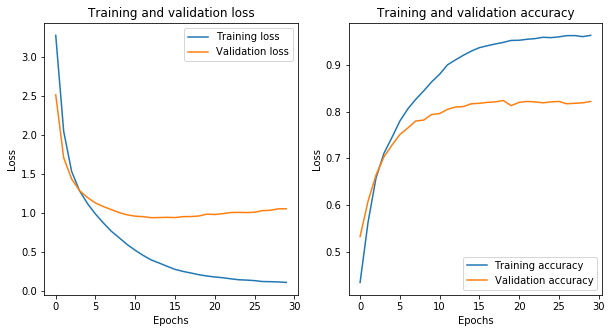

Maximum Training Accuracy: 0.9637935 Maximum Validation Accuracy 0.8240000009536743
2246/2246 [==============================] - 0s 128us/step
Maximum test Accuracy: [1.174414925137908, 0.792965292930603]


In [114]:
model = models.Sequential()
model.add(layers.Dense(128, activation = 'relu', input_shape= (10000,)))
model.add(layers.Dropout(0.1))
model.add(layers.Dense(128, activation = 'relu'))
model.add(layers.Dense(128, activation = 'relu'))
model.add(layers.Dense(46, activation = 'softmax'))
model.compile(optimizer=optimizers.Adamax(lr=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(partial_x_train, partial_y_train, epochs = 30, batch_size = 512, validation_data = (x_val, y_val))
plot(history.history)
results = model.evaluate(x_test, one_hot_test_labels)
print('Maximum test Accuracy:', results)

<h3> Change 10: Model-11: Changing learning rate and increasing epochs<h3>

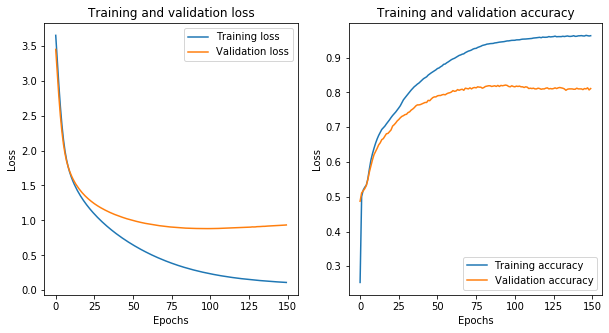

Maximum Training Accuracy: 0.9639188 Maximum Validation Accuracy 0.8209999799728394
2246/2246 [==============================] - 0s 88us/step
Maximum test Accuracy: [1.040702058710589, 0.7809438705444336]


In [71]:
model = models.Sequential()
model.add(layers.Dense(128, activation = 'tanh', input_shape= (10000,)))
model.add(layers.Dense(128, activation = 'tanh'))
model.add(layers.Dense(128, activation = 'tanh'))
model.add(layers.Dense(46, activation = 'softmax'))
model.compile(optimizer=optimizers.Adamax(lr=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(partial_x_train, partial_y_train, epochs = 150, batch_size = 512, validation_data = (x_val, y_val),verbose = 0)
plot(history.history)
results = model.evaluate(x_test, one_hot_test_labels)
print('Maximum test Accuracy:', results)

<h3> Change 11: Model-12:changing optimizer to SGD<h3>
        <b>Decreases accurcay to worst one : 36.68%<b>

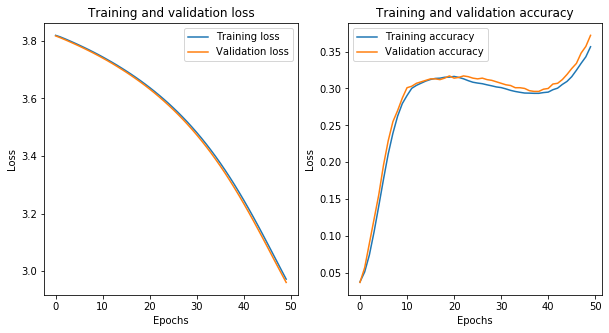

Maximum Training Accuracy: 0.35655224 Maximum Validation Accuracy 0.3720000088214874
2246/2246 [==============================] - 0s 83us/step
Maximum test Accuracy: [2.9576279717901404, 0.36687445640563965]


In [80]:
#with SGD optimizer 
model = models.Sequential()
model.add(layers.Dense(128, activation = 'relu', input_shape= (10000,)))
model.add(layers.Dense(128, activation = 'relu'))
model.add(layers.Dense(128, activation = 'relu'))
model.add(layers.Dense(46, activation = 'softmax'))
model.compile(optimizer=keras.optimizers.SGD(learning_rate=0.0001, momentum=0.9, nesterov=True), loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(partial_x_train, partial_y_train, epochs = 50, batch_size = 512, validation_data = (x_val, y_val),verbose = 0)
plot(history.history)
results = model.evaluate(x_test, one_hot_test_labels)
print('Maximum test Accuracy:', results)

<h3> Change 12: Model-13: Increasing the size of hidden units to 512 and adding dropout layer<h3>
        <b>Decreases test accuracy<b>

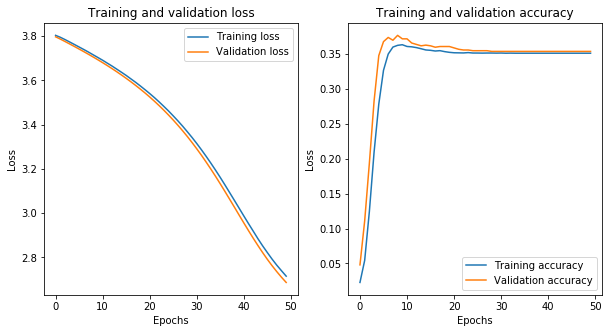

Maximum Training Accuracy: 0.36356804 Maximum Validation Accuracy 0.37700000405311584
2246/2246 [==============================] - 0s 153us/step
Maximum test Accuracy: [2.7011267898980784, 0.36197686195373535]


In [82]:
model = models.Sequential()
model.add(layers.Dense(512, activation = 'relu', input_shape= (10000,)))
model.add(layers.Dropout(0.01))
model.add(layers.Dense(512, activation = 'relu'))
model.add(layers.Dropout(0.01))
model.add(layers.Dense(512, activation = 'relu'))
model.add(layers.Dropout(0.01))
model.add(layers.Dense(46, activation = 'softmax'))
model.compile(optimizer=keras.optimizers.SGD(learning_rate=0.0001, momentum=0.9, nesterov=True), loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(partial_x_train, partial_y_train, epochs = 50, batch_size = 512, validation_data = (x_val, y_val),verbose = 0)
plot(history.history)
results = model.evaluate(x_test, one_hot_test_labels)
print('Maximum test Accuracy:', results)

<h3> Change 13: Model-14: Changing hidden units to 256 with SGD optimizer<h3>
        <b>Decreases test accuracy<b>

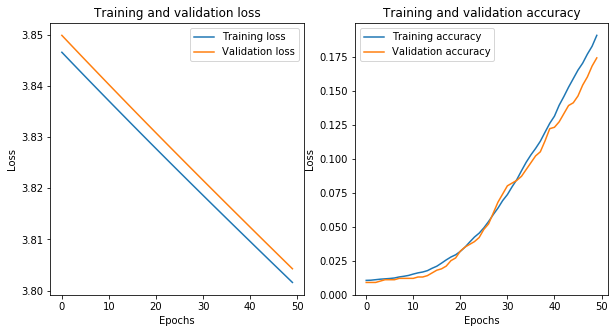

Maximum Training Accuracy: 0.19055374 Maximum Validation Accuracy 0.17399999499320984
2246/2246 [==============================] - 0s 128us/step
Maximum test Accuracy: [3.8008528579480925, 0.19768477976322174]


In [98]:
model = models.Sequential()
model.add(layers.Dense(256, activation = 'relu', input_shape= (10000,)))
model.add(layers.Dense(256, activation = 'relu'))
model.add(layers.Dense(256, activation = 'relu'))
model.add(layers.Dense(46, activation = 'softmax'))
model.compile(optimizer=keras.optimizers.SGD(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(partial_x_train, partial_y_train, epochs = 50, batch_size = 512, validation_data = (x_val, y_val),verbose = 0)
plot(history.history)
results = model.evaluate(x_test, one_hot_test_labels)
print('Maximum test Accuracy:', results)

<h3> Change 14: Model-15: Changing optimizer to Adam and increasing learning rate<h3>

Train on 7982 samples, validate on 1000 samples
Epoch 1/30
7982/7982 [==============================] - 2s 214us/step - loss: 3.2203 - accuracy: 0.3507 - val_loss: 2.5597 - val_accuracy: 0.5280
Epoch 2/30
7982/7982 [==============================] - 1s 75us/step - loss: 2.0938 - accuracy: 0.5496 - val_loss: 1.7405 - val_accuracy: 0.6010
Epoch 3/30
7982/7982 [==============================] - 1s 109us/step - loss: 1.5947 - accuracy: 0.6379 - val_loss: 1.5000 - val_accuracy: 0.6740
Epoch 4/30
7982/7982 [==============================] - 1s 107us/step - loss: 1.3620 - accuracy: 0.7073 - val_loss: 1.3479 - val_accuracy: 0.6930
Epoch 5/30
7982/7982 [==============================] - 1s 91us/step - loss: 1.1891 - accuracy: 0.7301 - val_loss: 1.2412 - val_accuracy: 0.7150
Epoch 6/30
7982/7982 [==============================] - 1s 90us/step - loss: 1.0574 - accuracy: 0.7543 - val_loss: 1.1677 - val_accuracy: 0.7260
Epoch 7/30
7982/7982 [==============================] - 1s 80us/step - loss: 0.

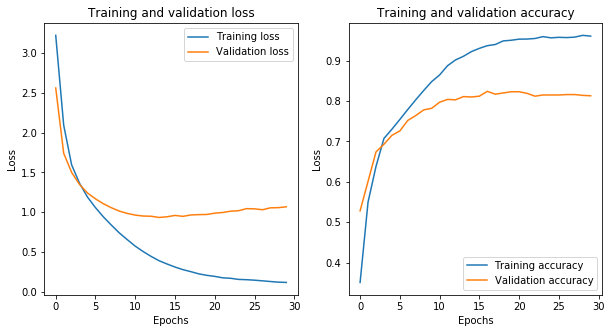

Maximum Training Accuracy: 0.962666 Maximum Validation Accuracy 0.8240000009536743
2246/2246 [==============================] - 0s 117us/step
Maximum test Accuracy: [1.0036722059665997, 0.7804986834526062]


In [111]:
checkpoint=keras.callbacks.ModelCheckpoint('/home/labina/Lectures(1학기)/AdvanceDeepLearning/checkpoint/chekpoint.hdf5',save_best_only=True,save_weights_only=True)
model = models.Sequential()
model.add(layers.Dense(128, activation = 'relu', input_shape= (10000,)))
model.add(layers.Dropout(0.1))
model.add(layers.Dense(128, activation = 'relu'))
model.add(layers.Dense(128, activation = 'relu'))
model.add(layers.Dense(46, activation = 'softmax'))
model.compile(optimizer=optimizers.Adamax(lr=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(partial_x_train, partial_y_train, epochs = 30, batch_size = 512, validation_data = (x_val, y_val),callbacks=[checkpoint])
plot(history.history)
model.load_weights('/home/labina/Lectures(1학기)/AdvanceDeepLearning/checkpoint/chekpoint.hdf5')
results = model.evaluate(x_test, one_hot_test_labels)
print('Maximum test Accuracy:', results)

<h3> Prediction <h3>

In [115]:
test_labels_copy = copy.copy(test_labels)
np.random.shuffle(test_labels_copy)
hits_array = np.array(test_labels) == np.array(test_labels_copy)
float(np.sum(hits_array)) / len(test_labels)

0.18121104185218165

In [116]:
predictions = model.predict(x_test)
predictions[0].shape

(46,)

In [117]:
np.sum(predictions[0])

1.0

In [118]:
np.argmax(predictions[0])

3